# Blobs

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

[[ 1.1991674  -0.01519222]
 [-0.00589242  0.82478598]
 [ 1.20467978  0.89658262]
 [ 0.7830198   1.12004469]
 [ 0.33889634  0.99366143]
 [ 1.12323786  1.0007939 ]
 [ 0.66405939  1.06022486]
 [ 0.93910874  0.10865528]
 [ 1.02758882 -0.05782346]
 [ 1.10058557 -0.10612585]
 [ 0.99158005  0.99979224]
 [ 0.13812882  1.04780915]
 [ 0.32448539  1.20047919]
 [ 0.99648653  1.16187921]
 [ 1.04206626  0.85103146]
 [-0.02039246  1.1705337 ]
 [-0.01476788  0.90047826]
 [ 1.06722929  0.25442724]
 [ 0.75355521 -0.06091077]
 [ 0.05940101  0.83604077]
 [ 0.02324211  1.05672438]
 [-0.12051145  0.89656753]
 [ 1.20564835 -0.07647649]
 [ 1.05467219  0.22069829]
 [ 0.10373081  1.10421237]
 [ 1.04303567  0.65191086]
 [ 0.11794919  0.93003714]
 [ 0.77464051 -0.26665004]
 [-0.04020051  1.12036846]
 [ 0.99137957 -0.05868256]
 [-0.1500323   0.76828434]
 [ 0.04295155  1.09132658]
 [ 0.03124125  1.14649586]
 [ 0.97024017  0.01412885]
 [ 0.73471923  1.05332227]
 [ 0.86368551  0.93635236]
 [ 0.02347598  1.03482716]
 

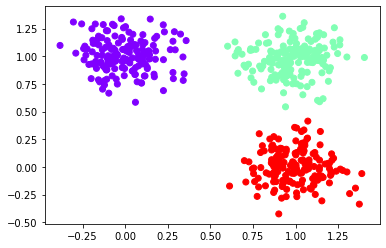

In [3]:
#Dataset:
centers = [[0, 1], [1, 1], [1, 0]]
X, labels_true = make_blobs(
    n_samples=500, centers=centers, cluster_std=0.15, random_state=0
)
# print(labels_true)
# Ploting Datapoints with origional labels/clusters
# print(X)
x,y = np.split(np.array(X), 2, axis=1);
plt.scatter(x,y, c=labels_true, cmap='rainbow');

In [4]:
# as Max Euclidean Distance is 2, we set preference less than -(distance^2)
af = AffinityPropagation(preference = -4, damping=.9).fit(X)
# PREFERENCE IMPACT


# THE INDEX IN X DATASET WHERE THE POINT IS BECOMING CENTER OF CLUSTER

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("number of clusters:", n_clusters_)

number of clusters: 3


[1.20467978 0.7830198  1.12323786 0.66405939 0.99158005 0.99648653
 1.04206626 1.04303567 0.73471923 0.86368551 1.06787336 1.19787053
 0.69753901 0.98048396 0.95983997 1.05083562 0.74528413 1.06946955
 0.90099155 1.00579458 1.08509354 0.88260563 1.13977726 0.97140198
 1.22799923 0.9803419  1.40443361 0.97224195 0.9802137  0.86008886
 0.92805163 1.12008472 1.14145691 1.1293894  0.73661641 0.64456196
 1.10476857 1.14137022 0.90121705 0.99764768 1.13942577 1.09076801
 0.94698524 1.02458929 1.16027641 0.96956547 0.99314441 1.02926045
 0.9864427  1.16445203 0.78910556 0.65670699 0.9478824  1.00555086
 1.09649717 0.80016825 0.96075318 1.05562375 1.07480354 0.73864657
 1.12304827 0.96896445 0.85217339 0.96369703 1.08677822 1.11571089
 0.94372793 0.81730922 1.14051137 1.08149678 0.84550971 0.94071565
 0.94114165 1.21998681 1.06861234 0.82902963 0.68580954 0.66166537
 0.90215596 0.89690514 0.9327752  1.17720679 1.12868859 0.72353957
 1.00129418 1.16504265 0.86229928 0.95363283 0.93412157 0.8968

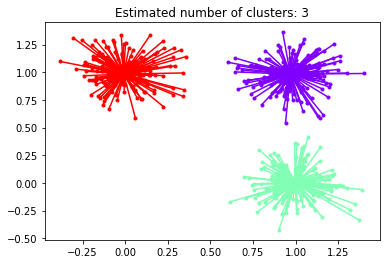

In [6]:
import matplotlib.pyplot as plt

# cm -> color map
colors = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, n_clusters_)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    # print(class_members)
    # print(X[class_members, 0])
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

Rand Score: 1.000
Silhouette Coefficient: 0.899


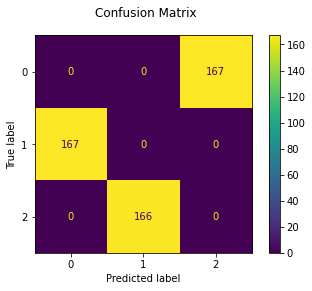

In [13]:
#Performance

# Rand Score
print("Rand Score: %.3f" % metrics.rand_score(labels_true, labels))

# Silhouette Coefficient
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(labels_true, labels)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### Changing Damping parameter


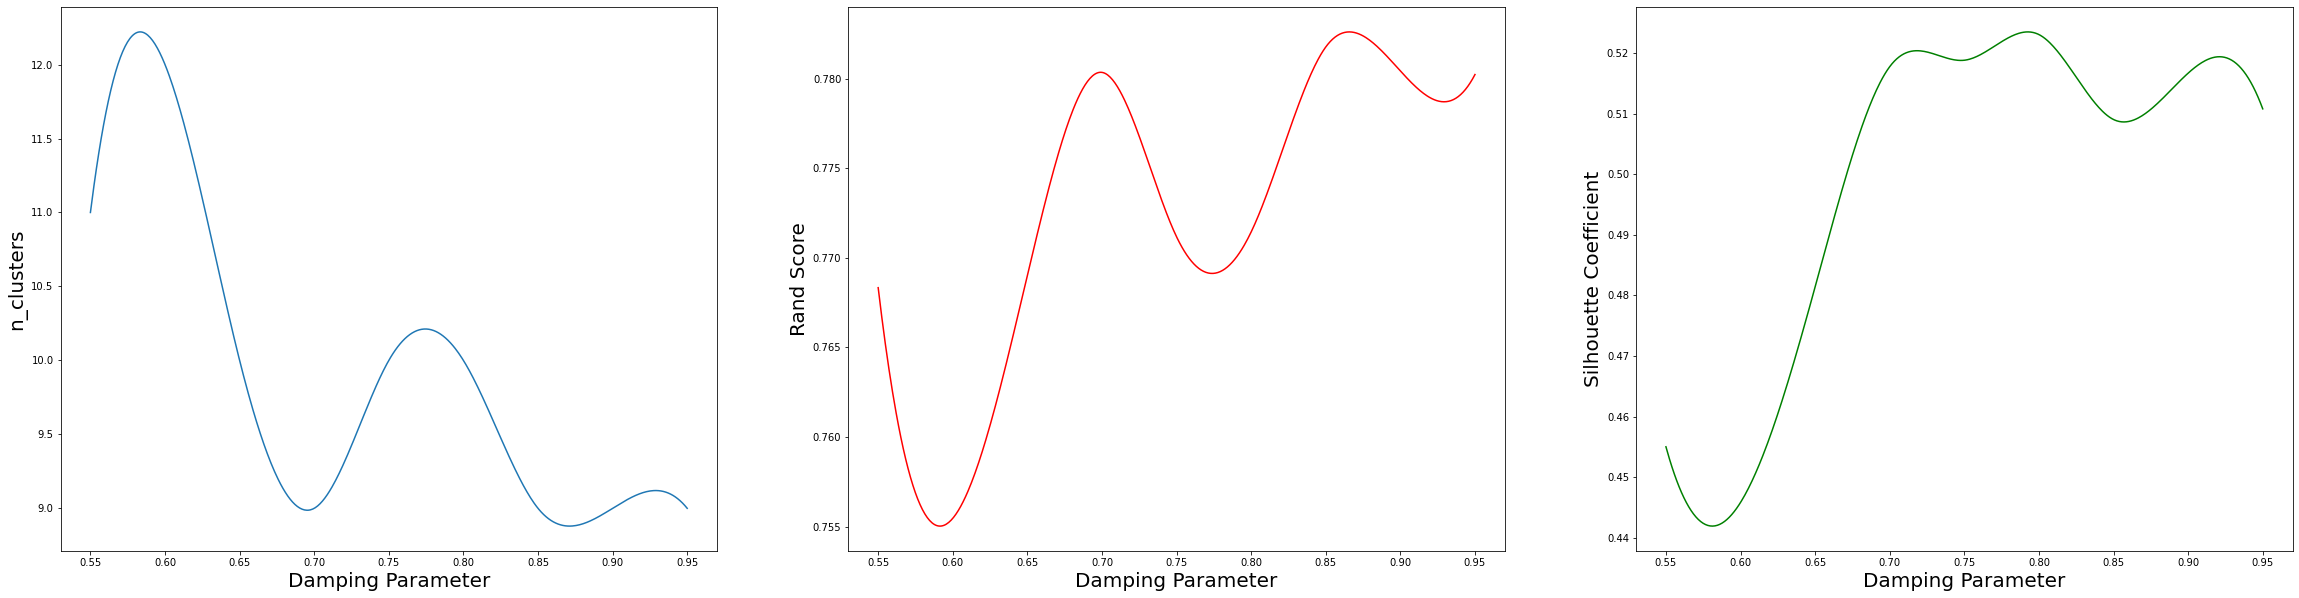

In [8]:
Damp, Clusters, Rand, Sil =[],[],[],[]

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
for damping in range(11, 20, 1):
  
  af = AffinityPropagation(random_state=0, damping =damping/20).fit(X)

  cluster_centers_indices = af.cluster_centers_indices_
  labels = af.labels_

  n_clusters_ = len(cluster_centers_indices)
  Rand_score = metrics.rand_score(labels_true, labels)
  if n_clusters_ != 0:
    silhouette_score = metrics.silhouette_score(X, labels, metric="sqeuclidean")
  else:
    silhouette_score = 0
  
  # print("For damping Value %.2f" % (damping/20),": %.3f " %Rand_score, "%.3f"  %silhouette_score)
  
  Clusters.append(n_clusters_)
  Damp.append(damping/20)
  Rand.append(Rand_score)
  Sil.append(silhouette_score)
  

Dampnp = np.array(Damp)
Clustersnp =np.array(Clusters)
Randnp= np.array(Rand)
Silnp=np.array(Sil)

X_W = make_interp_spline(Dampnp, Clustersnp)
X_Y = make_interp_spline(Dampnp, Randnp)
X_Z = make_interp_spline(Dampnp, Silnp)

X_ = np.linspace(Dampnp.min(), Dampnp.max(), 500)
W_ = X_W(X_)
Y_ = X_Y(X_)
Z_ = X_Z(X_)

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)

plt.subplot(1,3,1);
plt.plot(X_, W_);
plt.xlabel("Damping Parameter", fontsize=20);
plt.ylabel("n_clusters", fontsize=20);
plt.subplot(1,3,2);
plt.plot(X_, Y_, color='red');
plt.xlabel("Damping Parameter", fontsize=20);
plt.ylabel("Rand Score", fontsize=20);
plt.subplot(1,3,3);
plt.plot(X_, Z_, color='green');
plt.xlabel("Damping Parameter", fontsize=20);
plt.ylabel("Silhouette Coefficient", fontsize=20);
plt.show()

# Cricketers




In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [16]:

cric = pd.read_csv("/content/drive/MyDrive/PLL/Assignment 2/total_data_na.csv")
# cric.info()
X = cric.iloc[:, range(1,24)].values
labels_true= cric.iloc[:, 0].values

# print(X)
# x,y = np.split(np.array(X), 2, axis=1)  
# plt.scatter(x,y, c=labels_true, cmap='rainbow_r')
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PLL/Assignment 2/total_data_na.csv'

In [ ]:
af = AffinityPropagation().fit(X)

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("number of clusters:", n_clusters_)


number of clusters: 11


In [ ]:
#Performance

# Rand Score
print("Rand Score: %.3f" % metrics.rand_score(labels_true, labels))

# Silhouette Coefficient
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)



Rand Score: 0.903
Silhouette Coefficient: 0.551


# Iris

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [18]:
iris = pd.read_csv("/content/drive/MyDrive/PLL/Assignment 1B/Iris.csv")
X = iris.iloc[:, [0, 1, 2, 3]].values
labels_true= iris.iloc[:, 0].values

# x,y = np.split(np.array(X), 2, axis=1)  
# plt.scatter(x,y, c=labels_true, cmap='rainbow_r')
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PLL/Assignment 1B/Iris.csv'

In [ ]:
af = AffinityPropagation(damping=.9).fit(X)

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("number of clusters:", n_clusters_)

number of clusters: 7


In [ ]:
#Performance

# Rand Score
print("Rand Score: %.3f" % metrics.rand_score(labels_true, labels))

# Silhouette Coefficient
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)



Rand Score: 0.860
Silhouette Coefficient: 0.689
